In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import ones
from numpy import array
import matplotlib.pyplot as plt
from numpy import mean

In [3]:
Φ = array([	[1, 1,1],
			[4, 2,1],
			[2.25, 1.5,1],
			[9, 3,1]])

In [4]:
n = Φ.shape[0]
d = Φ.shape[1]

In [5]:
y = array([	[1],
			[1],
			[0],
			[2]])

In [6]:
w = array([[1],[1],[1]]) 
η = 0.01

In [7]:
def f(w):
	ε = Φ.dot(w) - y	# error for each sample
	mse = (1/n)*ε.T.dot(ε)	# average error squared
	return mse.item()		# make sure it is scalar
#

The equation for the gradient is <br>
$$f'(x) = \frac{2}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i) \phi(x_i)$$<br>
You can rewrite it into compact matrix vector form if you are good, note that $y$ is<br>
a column vector of all labels.<br>
The derivation can be found here:<br>
https://github.com/endsley/ml_examples/blob/master/regression_examples/compact_regression_derivative_derivation.pdf<br>
$$f'(x) = \frac{2}{n} \Phi^{\top}(\Phi w - y)$$<br>
I wrote both version of the code below, try them both and see they are the same.

In [8]:
def fᑊ(w):
	ᐁf = np.zeros((d,1))
	for Φᵢ, yᵢ in zip(Φ,y):
		Φᵢ = np.reshape(Φᵢ, (d,1))
		ᐁf += (w.T.dot(Φᵢ) - yᵢ)*Φᵢ
	return (2/n)*ᐁf

This is the compact derivative and the better version<br>
# Comment out the other definition and notice this is the same<br>
ef fᑊ(w): return (2/n)*Φ.T.dot(Φ.dot(w) - y)

In [9]:
f_value_list = []
for i in range(400):
	w = w - η*fᑊ(w)				# gradient descent update w
	f_value_list.append(f(w))

In [10]:
print('Best w = \n', w)
print('Predictions: \n', Φ.dot(w))

Best w = 
 [[ 0.20442337]
 [-0.07507173]
 [ 0.29942367]]
Predictions: 
 [[0.42877531]
 [0.96697369]
 [0.64676865]
 [1.91401882]]


Get the points for the best fit line

In [11]:
xp = np.linspace(0,4,10)
fₓ = w[0]*xp*xp + w[1]*xp + w[2]

Draw the best fit line and the data out

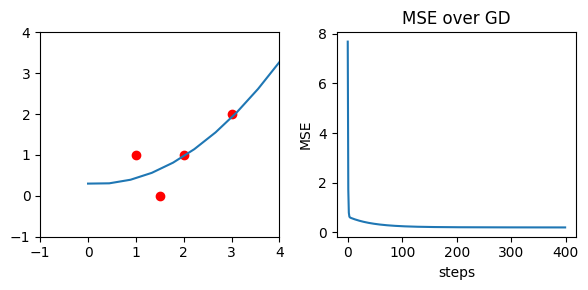

In [12]:
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.scatter(Φ[:,1], y, color='red')
plt.plot(xp, fₓ)
plt.xlim(-1,4)	# Show this region along x-axis
plt.ylim(-1,4)	# Show this region along y-axis
#
# Display the error over GD
plt.subplot(122)
plt.plot(f_value_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()